In [2]:
import pandas as pd
import seaborn as sns
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [3]:
data1 = pd.read_csv('binary_benign.csv')
data2 = pd.read_csv('binary_dos.csv')

In [ ]:

# merging datasets
# List of CSV file paths
csv_files = [
    'S:\CYBERHAWKS/binary_benign.csv',
    'S:\CYBERHAWKS/binary_dos.csv',
    'S:\CYBERHAWKS/binary_spoofing-GAS.csv',
    'S:\CYBERHAWKS/binary_spoofing-RPM.csv',
    'S:\CYBERHAWKS/binary_spoofing-SPEED.csv',
    'S:\CYBERHAWKS/binary_spoofing-STEERING_WHEEL.csv',




    #'path/to/csv/file3.csv',
    # Add more file paths as needed
]

# Read and concatenate all CSV files
merged_data = pd.concat([pd.read_csv(file) for file in csv_files])

 #Save the merged DataFrame to a new CSV file
merged_data.to_csv('S:\CYBERHAWKS/merged_data.csv', index=False)
print("Merging complete! The merged file is saved as 'merged_data.csv'.")


<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:6: SyntaxWarning: invalid escape sequence '\C'
<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:8: SyntaxWarning: invalid escape sequence '\C'
<>:21: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:6: SyntaxWarning: invalid escape sequence '\C'
<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:8: SyntaxWarning: invalid escape sequence '\C'
<>:21: SyntaxWarning: invalid escape sequence '\C'
C:\Users\green\AppData\Local\Temp\ipykernel_6100\2010933207.py:3: SyntaxWarning: invalid escape sequence '\C'
  'S:\CYBERHAWKS/binary_benign.csv',
C:\Users\green\AppData\Local\Temp\ipykernel_6100\2010933207.py:4: SyntaxWarning: invalid escape sequence '\C'
  'S:\CYBERHAWKS/binary_dos.csv',
C:\User

Merging complete! The merged file is saved as 'merged_data.csv'.


In [5]:
merged_data

,ID0,ID1,ID2,ID3,ID4,ID5,ID6,ID7,ID8,ID9,...,DATA_710,DATA_711,DATA_712,DATA_713,DATA_714,DATA_715,DATA_716,label,category,specific_class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,BENIGN,BENIGN,BENIGN
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,BENIGN,BENIGN,BENIGN
2,0,0,0,0,0,0,0,1,0,0,...,1,1,1,1,1,1,1,BENIGN,BENIGN,BENIGN
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,BENIGN,BENIGN,BENIGN
4,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,BENIGN,BENIGN,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19972,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,ATTACK,SPOOFING,STEERING_WHEEL
19973,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,ATTACK,SPOOFING,STEERING_WHEEL
19974,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,ATTACK,SPOOFING,STEERING_WHEEL
19975,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,ATTACK,SPOOFING,STEERING_WHEEL


In [6]:
merged_data.head(4)

,ID0,ID1,ID2,ID3,ID4,ID5,ID6,ID7,ID8,ID9,...,DATA_710,DATA_711,DATA_712,DATA_713,DATA_714,DATA_715,DATA_716,label,category,specific_class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,BENIGN,BENIGN,BENIGN
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,BENIGN,BENIGN,BENIGN
2,0,0,0,0,0,0,0,1,0,0,...,1,1,1,1,1,1,1,BENIGN,BENIGN,BENIGN
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,BENIGN,BENIGN,BENIGN


In [7]:
label_column = merged_data['label']
print(label_column)


0        BENIGN
1        BENIGN
2        BENIGN
3        BENIGN
4        BENIGN
          ...  
19972    ATTACK
19973    ATTACK
19974    ATTACK
19975    ATTACK
19976    ATTACK
Name: label, Length: 1408219, dtype: object


In [8]:
specific_column = merged_data['specific_class']
print(specific_column)

0                BENIGN
1                BENIGN
2                BENIGN
3                BENIGN
4                BENIGN
              ...      
19972    STEERING_WHEEL
19973    STEERING_WHEEL
19974    STEERING_WHEEL
19975    STEERING_WHEEL
19976    STEERING_WHEEL
Name: specific_class, Length: 1408219, dtype: object


In [9]:
merged_data.describe()

,ID0,ID1,ID2,ID3,ID4,ID5,ID6,ID7,ID8,ID9,...,DATA_77,DATA_78,DATA_79,DATA_710,DATA_711,DATA_712,DATA_713,DATA_714,DATA_715,DATA_716
count,1408219.0,1408219.0,1408219.0,1408219.0,1408219.0,1408219.0,1.408219e+06,1.408219e+06,1.408219e+06,1.408219e+06,...,1408219.0,1408219.0,1.408219e+06,1.408219e+06,1.408219e+06,1.408219e+06,1.408219e+06,1.408219e+06,1.408219e+06,1.408219e+06
mean,0.0,0.0,0.0,0.0,0.0,0.0,1.695241e-01,4.271850e-01,2.915306e-01,1.316230e-01,...,0.0,0.0,2.208378e-01,2.578867e-01,2.514027e-01,2.546443e-01,2.243515e-01,2.201085e-01,2.391546e-01,2.300289e-01
std,0.0,0.0,0.0,0.0,0.0,0.0,3.752143e-01,4.946697e-01,4.544675e-01,3.380806e-01,...,0.0,0.0,4.148115e-01,4.374715e-01,4.338197e-01,4.356613e-01,4.171547e-01,4.143198e-01,4.265674e-01,4.208512e-01
min,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.0,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.0,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
merged_data.describe(include='object')


,label,category,specific_class
count,1408219,1408219,1408219
unique,2,3,6
top,BENIGN,BENIGN,BENIGN
freq,1223737,1223737,1223737


In [11]:
print(merged_data.columns)


Index(['ID0', 'ID1', 'ID2', 'ID3', 'ID4', 'ID5', 'ID6', 'ID7', 'ID8', 'ID9',
       ...
       'DATA_710', 'DATA_711', 'DATA_712', 'DATA_713', 'DATA_714', 'DATA_715',
       'DATA_716', 'label', 'category', 'specific_class'],
      dtype='object', length=156)


In [12]:

# Fill missing values with column means
merged_data.fillna(merged_data.apply(pd.to_numeric, errors='coerce').mean(), inplace=True)

In [13]:
import csv

def count_nan_rows_columns(input_file):
    with open(input_file, 'r') as file:
        data = list(csv.reader(file))
    
    nan_rows = sum('' in row for row in data)
    nan_columns = sum('' in col for col in zip(*data))

    return nan_rows, nan_columns

# Usage
input_file = 'merge.ipynb'
nan_rows, nan_columns = count_nan_rows_columns(input_file)
print(f"Rows with NaN values: {nan_rows}")
print(f"Columns with NaN values: {nan_columns}")


Rows with NaN values: 2099
Columns with NaN values: 0


<Axes: xlabel='label', ylabel='count'>

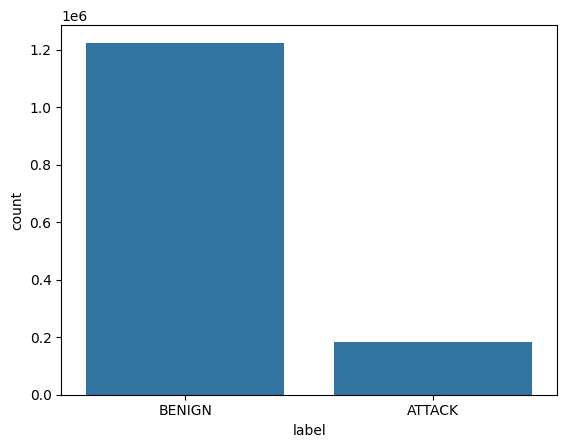

In [14]:
sns.countplot(x=merged_data['label'])


In [15]:
print('Class distribution on label column:')
print(merged_data['label'].value_counts())

Class distribution on label column:
label
BENIGN    1223737
ATTACK     184482
Name: count, dtype: int64


In [16]:
# Mapping target variable to 0 and 1
merged_data['label'] = merged_data['label'].map({'BENIGN': 0, 'ATTACK': 1})

In [17]:
merged_data['category'] = merged_data['category'].map({'BENIGN': 0, 'ATTACK': 1})

In [18]:
merged_data['specific_class'] = merged_data['specific_class'].map({'BENIGN': 0, 'ATTACK': 1})

In [19]:
X = merged_data.drop('label', axis=1)
y = merged_data['label']

In [20]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Instantiate a SimpleImputer with a strategy (e.g., mean, median, mode)
imputer = SimpleImputer(strategy='mean')

In [22]:
# Fit the imputer to the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Regression


In [23]:
# Instantiate and fit the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_imputed, y_train)

LinearRegression()

In [24]:
# Make predictions
linear_reg_predictions = linear_reg.predict(X_test_imputed)

In [26]:
# Calculate Mean Squared Error
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)

print("Linear Regression Metrics:")
print(f"Mean Squared Error: {linear_reg_mse}")
print(f"Mean Absolute Error: {linear_reg_mae}")
print(f"R-squared: {linear_reg_r2}")

Linear Regression Metrics:
Mean Squared Error: 0.007811046539725965
Mean Absolute Error: 0.05179995544434371
R-squared: 0.9313197402570353


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert regression predictions into binary classification predictions
# Example: Thresholding at 0.5
y_pred = (linear_reg_predictions >= 0.5).astype(int)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = (y_pred == y_test).mean()

print(f"Accuracy: {accuracy}")
print("Classification Metrics (Threshold=0.5):")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9997798639417137
Classification Metrics (Threshold=0.5):
Precision: 0.9983745123537061
Recall: 0.9999457318065882
F1 Score: 0.999159504378711


In [28]:

print("LINEAR REGRESSION:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred ))

LINEAR REGRESSION:
[[244730     60]
 [     2  36852]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    244790
           1       1.00      1.00      1.00     36854

    accuracy                           1.00    281644
   macro avg       1.00      1.00      1.00    281644
weighted avg       1.00      1.00      1.00    281644



# Classification


In [29]:
# Create a Random Forest Classifier with reduced parameters
rfc = RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_split=10, min_samples_leaf=5, max_features='sqrt')

In [30]:
# Train the model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=10)

In [31]:
y_pred = rfc.predict(X_test)


In [32]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classification Metrics:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")



Random Forest Classification Metrics:
Precision: 1.0
Recall: 0.918624843978944
F1 Score: 0.9575867287049739
Accuracy: 0.9893518058257943


In [33]:

print("RANDOM FOREST:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred ))



RANDOM FOREST:
[[244790      0]
 [  2999  33855]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    244790
           1       1.00      0.92      0.96     36854

    accuracy                           0.99    281644
   macro avg       0.99      0.96      0.98    281644
weighted avg       0.99      0.99      0.99    281644



In [34]:
#saving machine learning models using the joblib library.
if not os.path.exists('Models'):
    os.makedirs('Models')

if not os.path.exists('Scalers'):
    os.makedirs('Scalers')
joblib.dump(rfc, 'Models/RandomForestClassifier.pkl')
joblib.dump(linear_reg, 'Models/LinearRegression.pkl')

['Models/LinearRegression.pkl']